<a href="https://colab.research.google.com/github/adudars/PedidON/blob/master/arquivos/10.Relat%C3%B3rios%26Gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **10 RELATÓRIOS E GRÁFICOS**

## **ESTABELECENDO CONEXÃO**




### Instalando bibliotecas de acesso

In [ ]:
#!pip install --user psycopg2-binary
#!pip install --user pandas
#!pip install --user seaborn

### Importando bibliotecas

In [ ]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
from datetime import date
import random

### Conectando com o banco através do psycopg2

In [ ]:
conn = psycopg2.connect(host="lallah.db.elephantsql.com",database="nxthbnlu", user="nxthbnlu", password="buyAYKsY17pqexg1grIcJaWm0gHBsO2F")

## **RELATÓRIOS E RESPECTIVOS GRÁFICOS**

### **Relatório 01**
**Objetivo:** Nome e quantidade total de atendimentos realizados pelos funcionários no último mês, principalmente pelo funcionário destaque

In [ ]:
funcionario_destaque = pd.read_sql_query("""select nome_funcionario, count(Fk_id_Funcionario) as atendimentos
                                            from comanda as c
                                            inner join funcionario as f on
                                            (f.id_Funcionario = c.Fk_id_Funcionario)
                                            where date_part('month',data) = date_part('month',(current_date + INTERVAL '-1 month')) and date_part('year',data) = date_part('year',(current_date + INTERVAL '-1 month'))
                                            group by nome_funcionario
                                            order by atendimentos desc
                                        """, conn)

In [ ]:
funcionario_destaque

,nome_funcionario,atendimentos
0,Bernardo,7
1,Matheus Henrique,6
2,Ismael,4
3,Eloisa,3
4,Fernanda,3
5,Gabriel,3
6,Adrian,3
7,Aline,3
8,Ana Clara,3
9,Juliana,3


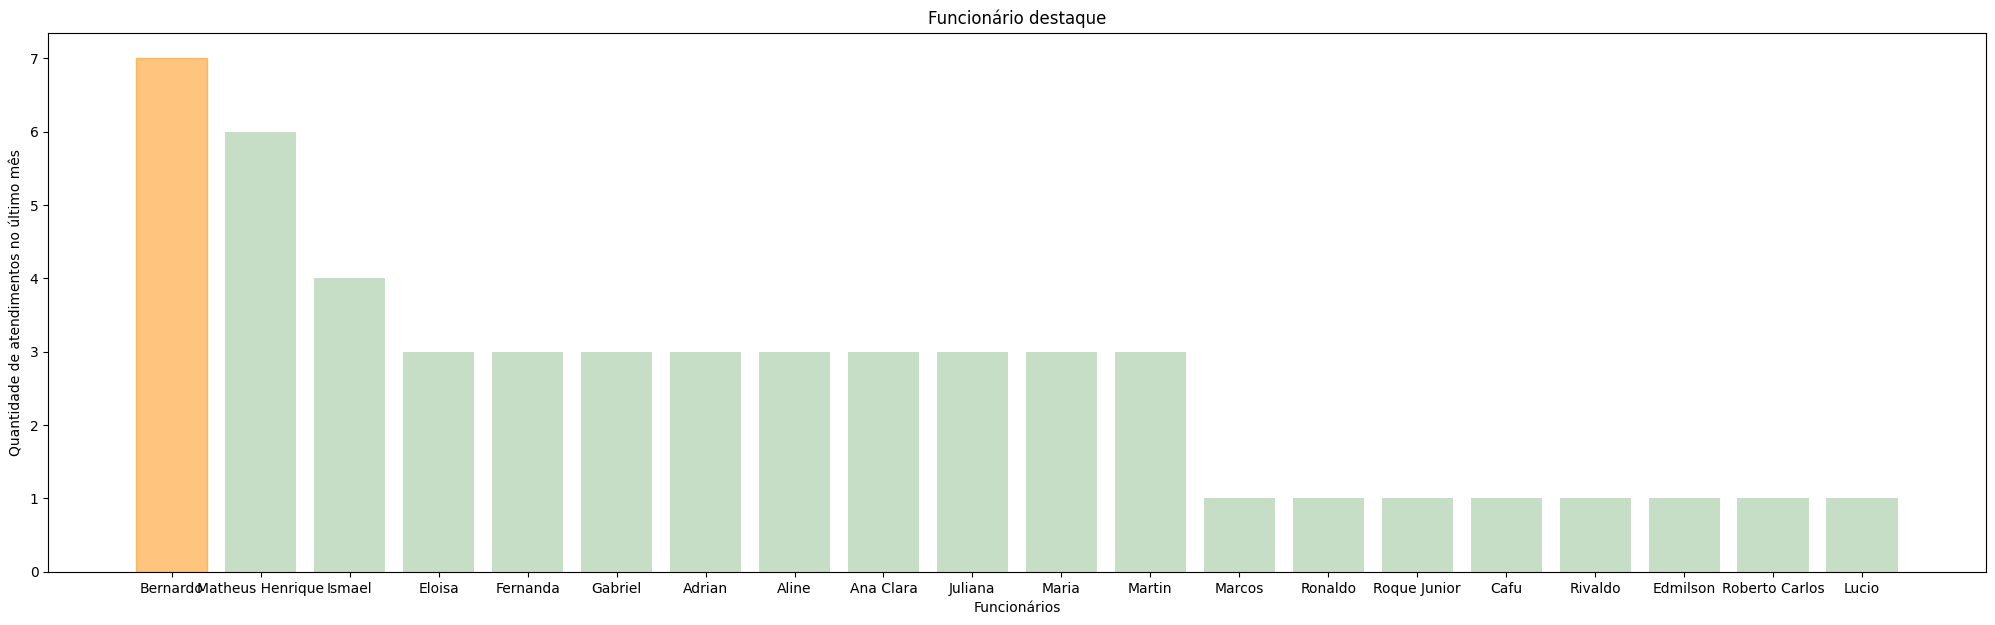

In [ ]:

df = pd.DataFrame(funcionario_destaque)
objects = tuple(df.nome_funcionario)
y_pos = np.arange(len(objects))
performance = list(df.atendimentos)
plt.figure(figsize=(25, 7))
funcs = plt.bar(y_pos, performance, align='center', alpha=0.5, color='darkseagreen')
funcs[0].set_color('darkorange')
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade de atendimentos no último mês')
plt.xlabel('Funcionários')
plt.title('Funcionário destaque')

plt.show()

### **Relatório 02**
**Objetivo:** Nome e número total de frequência dos clientes no último mês

In [ ]:
frequencia_cliente = pd.read_sql_query("""select nome_cliente, count(distinct data) as frequencia
                                          from cliente as c
                                          inner join comanda as cd on
                                          (c.id_cliente = cd.fk_id_cliente)
                                          where date_part('month',data) = date_part('month',(current_date + INTERVAL '-1 month')) and date_part('year',data) = date_part('year',(current_date + INTERVAL '-1 month'))
                                          group by nome_cliente
                                          order by frequencia desc""", conn)

In [ ]:
frequencia_cliente

,nome_cliente,frequencia
0,Jorge,4
1,Antonella,3
2,Bento,3
3,Clarice,3
4,Davi,3
5,Diego,3
6,Ana,3
7,Henrique,3
8,Isabella,3
9,Lara,3


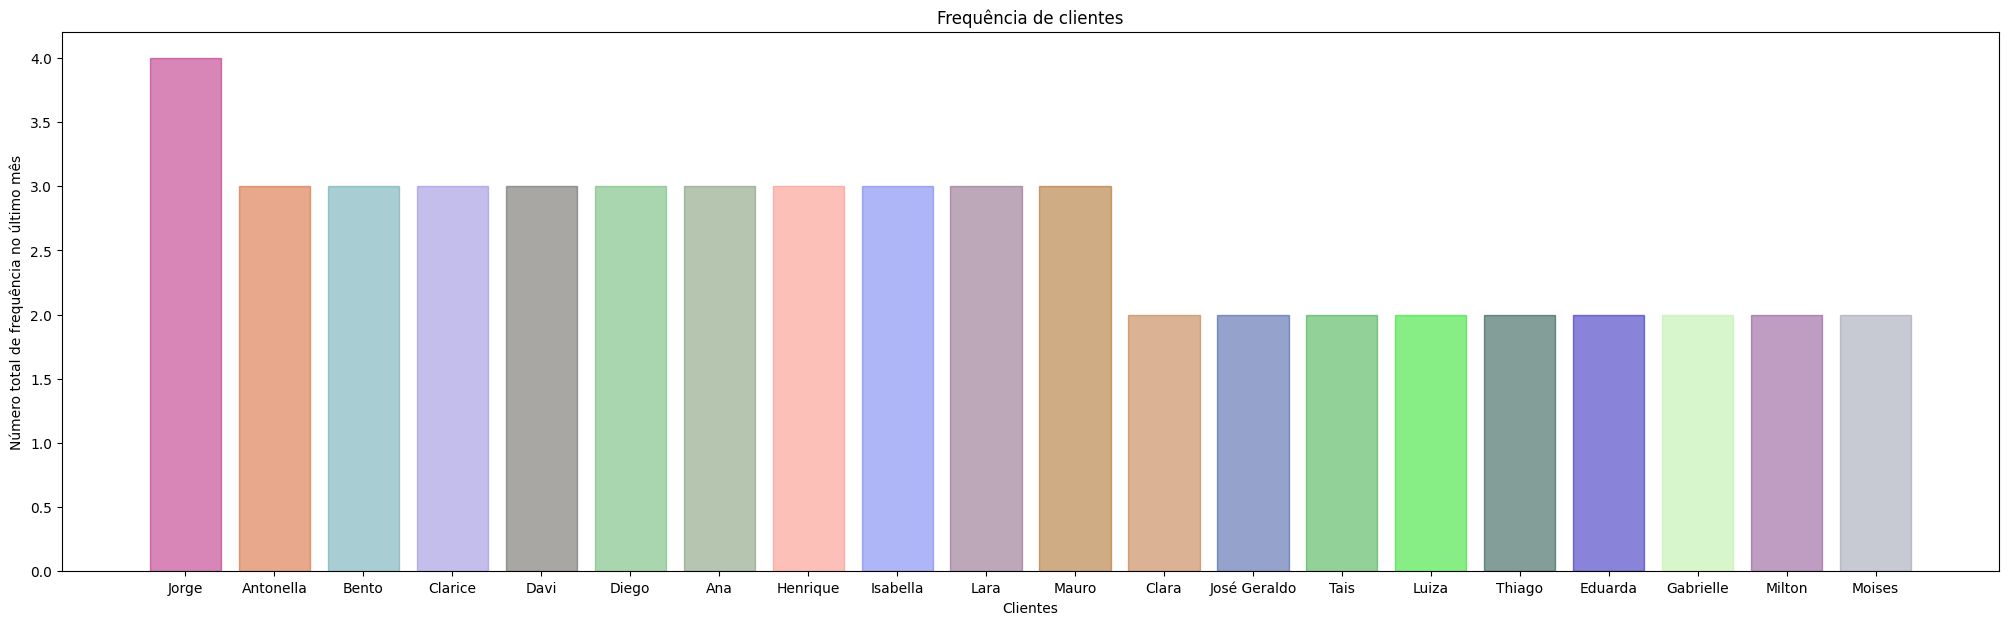

In [ ]:
df = pd.DataFrame(frequencia_cliente)
 
objects = tuple(df.nome_cliente)
y_pos = np.arange(len(objects))
performance = list(df.frequencia)
plt.figure(figsize=(25, 7))
clientes = plt.bar(y_pos, performance, align='center', alpha=0.5)

#Colorindo aleatoriamente cada cliente
num_cores = len(clientes)
cor = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(num_cores)]
for i in range(0,len(clientes)):
  clientes[i].set_color(cor[i])

plt.xticks(y_pos, objects)
plt.ylabel('Número total de frequência no último mês')
plt.xlabel('Clientes')
plt.title('Frequência de clientes')
 
plt.show()

### **Relatório 03**
**Objetivo:** Nome, valor e o total de pedidos dos itens de cardápio no último mês

In [ ]:
cardapio_top_3 = pd.read_sql_query("""select ic.nome_item, ic.preco as valor, sum(quantidade) as total_pedidos
                                      from pedido as p
                                      inner join item_cardapio as ic on
                                      (ic.id_itemcardapio = p.fk_id_itemcardapio)
                                      inner join comanda as cd on
                                      (p.fk_id_comanda = cd.id_comanda)
                                      where date_part('month',data) = date_part('month',(current_date + INTERVAL '-1 month')) and date_part('year',data) = date_part('year',(current_date + INTERVAL '-1 month'))
                                      group by ic.nome_item, ic.preco
                                      order by total_pedidos desc
                                      """, conn)

In [ ]:
cardapio_top_3

,nome_item,valor,total_pedidos
0,Appia,25.90,10
1,Brisa,26.00,9
2,Cachaça,11.90,8
3,Convento da Penha,115.00,4
4,Coca cola,9.90,4
5,Red Label,299.00,3
6,Beira mar,17.99,3
7,Suco,8.99,3
8,Parque Moscoso,145.00,3
9,Brahma,6.90,3


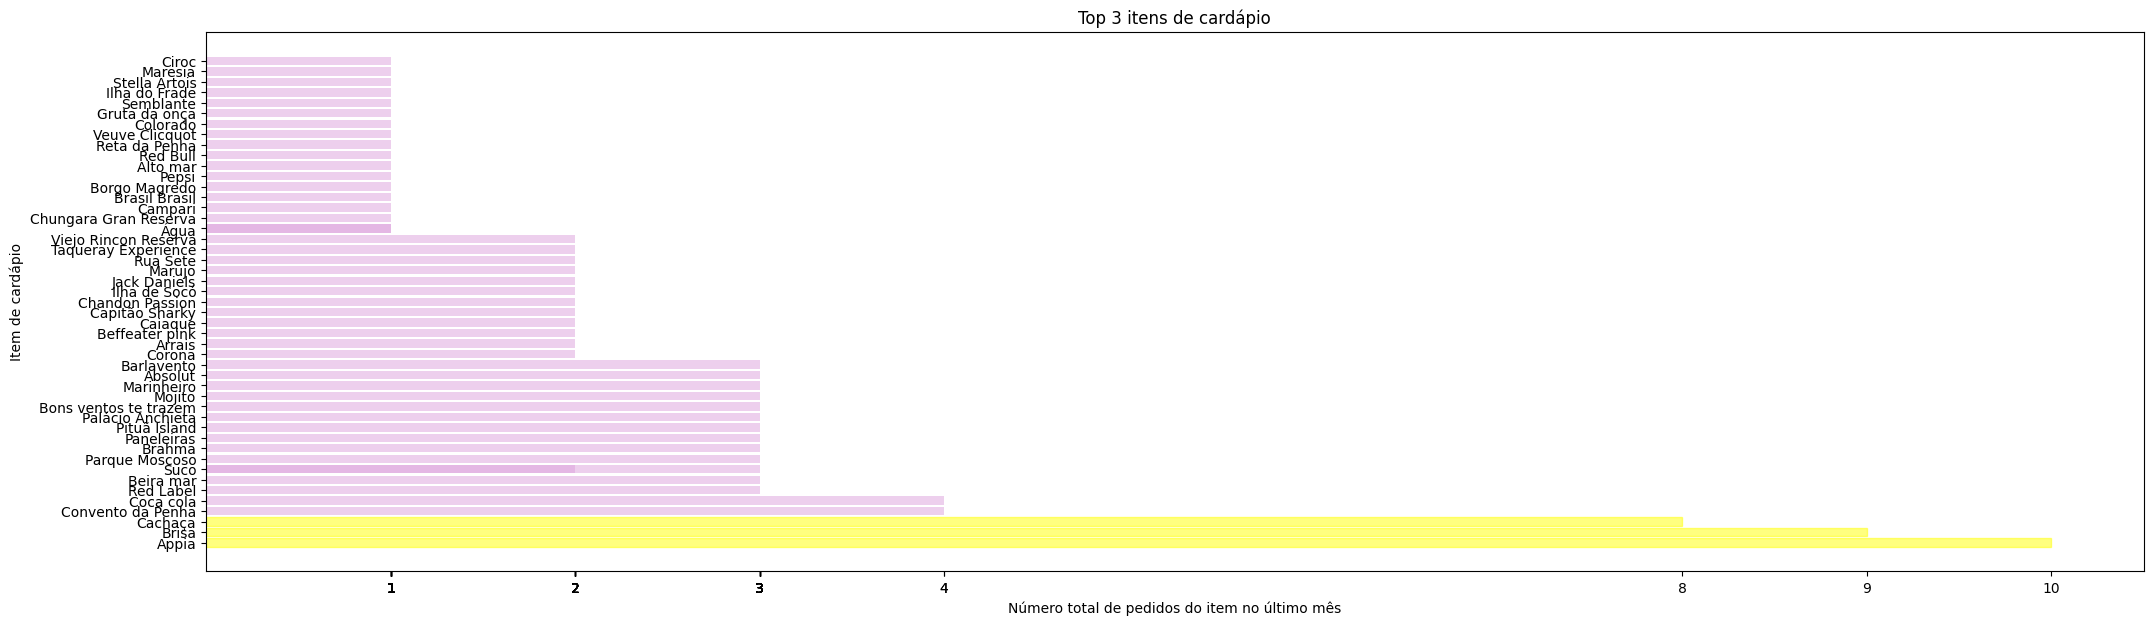

In [ ]:
df = pd.DataFrame(cardapio_top_3)
 
objects = tuple(df.total_pedidos)
y_pos = np.arange(len(objects))
performance = list(df.nome_item)
plt.figure(figsize=(25, 7))
itens = plt.barh(performance, objects, alpha=0.5, color='plum')
#Colorindo os tops 3
for i in range(0,3):
  itens[i].set_color('yellow')

plt.xticks(objects)
plt.xlabel('Número total de pedidos do item no último mês')
plt.ylabel('Item de cardápio')
plt.title('Top 3 itens de cardápio')

plt.show()

### **Relatório 04**
**Objetivo:** Valor total faturado por dia

In [ ]:
faturamento_diario = pd.read_sql_query("""select sum(preco * quantidade) as valor_total_dia, data
                                          from item_cardapio as cp
                                          inner join pedido as p on
                                          (p.fk_id_itemcardapio = cp.id_itemcardapio)
                                          inner join comanda as cd on
                                          (p.fk_id_comanda = cd.id_comanda)
                                          group by data
                                          """, conn)

In [ ]:
faturamento_diario

,valor_total_dia,data
0,2484.44,2020-08-03
1,1274.19,2020-08-01
2,998.80,2020-07-31
3,255.20,2020-08-31
4,3642.68,2020-08-02
5,778.29,2020-07-30
6,3508.16,2020-08-04
7,1967.40,2020-09-23


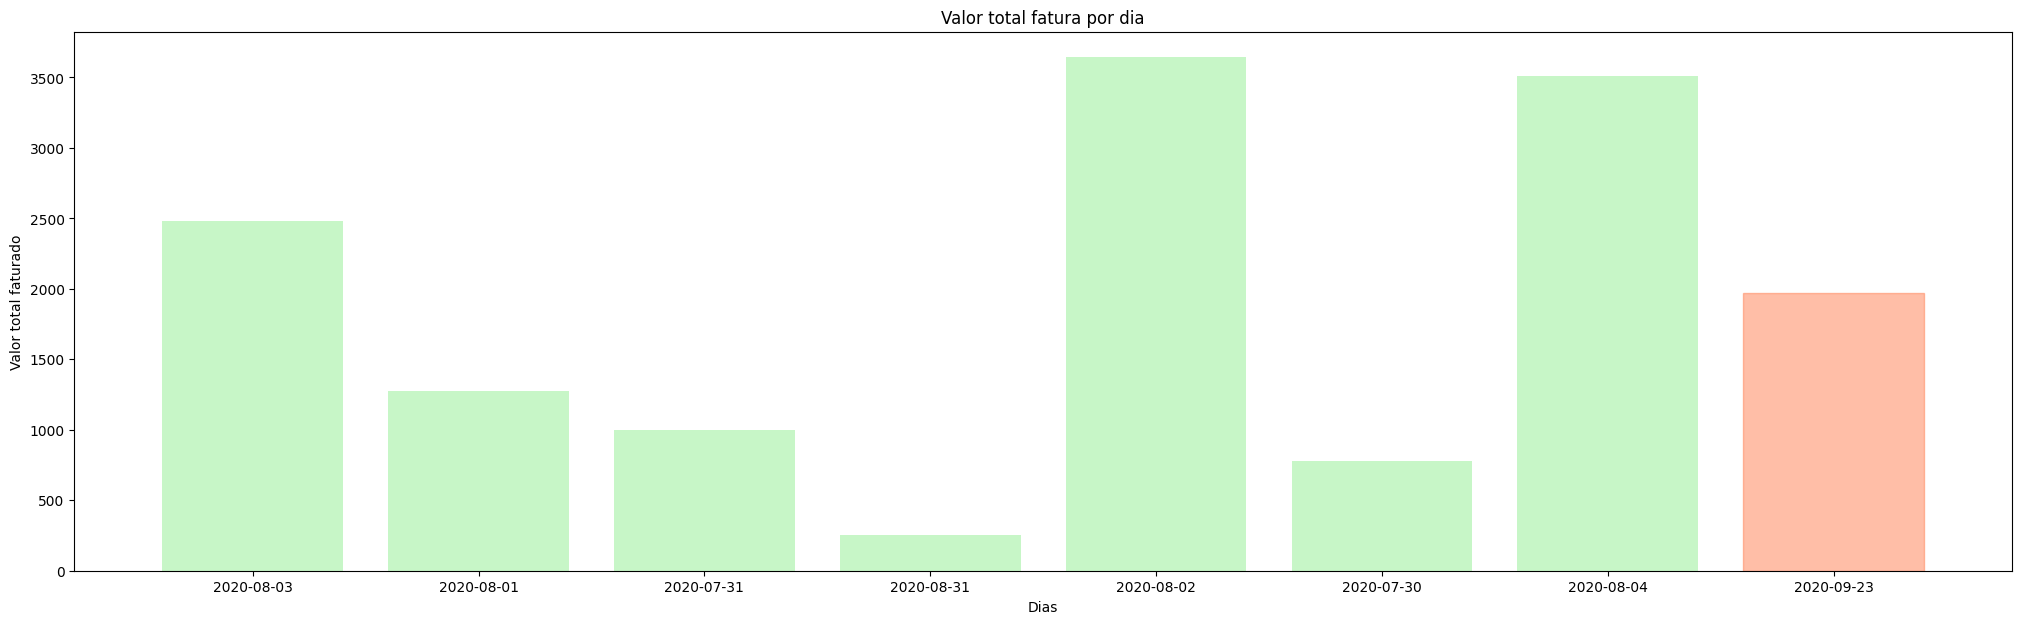

In [ ]:
df = pd.DataFrame(faturamento_diario)

objects = tuple(df.data)
last_day = objects[-1]
y_pos = np.arange(len(objects))
performance = list(df.valor_total_dia)
plt.figure(figsize=(25, 7))
dias = plt.bar(y_pos, performance, align='center', alpha=0.5, color='lightgreen')

#Colorindo o dia atual
if(last_day == date.today()):
  dias[-1].set_color('coral')


plt.xticks(y_pos, objects)
plt.xlabel('Dias')
plt.ylabel('Valor total faturado')
plt.title('Valor total fatura por dia')
 
plt.show()

### **Relatório 05**
**Objetivo:** Nome e o valor total gasto de cada cliente no último mês.

In [ ]:
gasto_cliente = pd.read_sql_query("""select nome_cliente, sum(quantidade * preco) as valor_total
                                    from comanda as cd
                                    inner join pedido as p on
                                    (cd.id_comanda = p.fk_id_comanda)
                                    inner join item_cardapio as ic on(
                                    p.fk_id_itemcardapio = ic.id_itemcardapio)
                                    inner join cliente as c on
                                    (cd.fk_id_cliente = c.id_cliente)
                                    where date_part('month',data) = date_part('month',(current_date + INTERVAL '-1 month')) and date_part('year',data) = date_part('year',(current_date + INTERVAL '-1 month'))
                                    group by nome_cliente
                                    order by valor_total desc;
                                    """, conn)

In [ ]:
gasto_cliente

,nome_cliente,valor_total
0,Clara,1929.60
1,Davi,1411.49
2,Ana,1292.18
3,Henrique,1168.79
4,Tais,906.87
5,Isabella,880.67
6,Bento,780.97
7,Moises,634.00
8,Luiza,560.99
9,Jorge,485.30


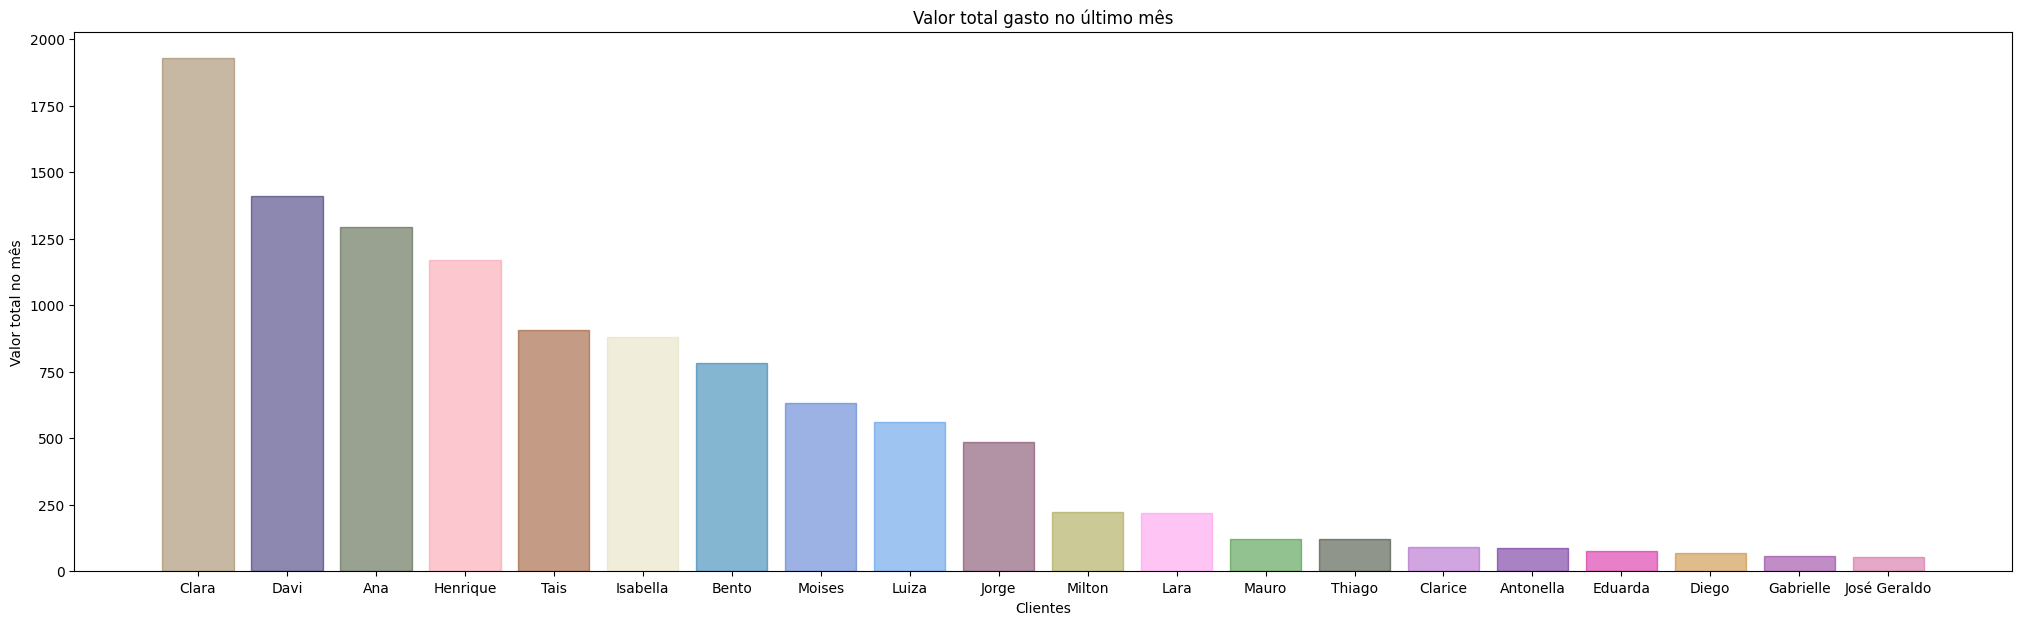

In [ ]:
df = pd.DataFrame(gasto_cliente)
 
objects = tuple(df.nome_cliente)
y_pos = np.arange(len(objects))
performance = list(df.valor_total)
plt.figure(figsize=(25, 7))
clientes = plt.bar(y_pos, performance, align='center', alpha=0.5, color='orange')

#Colorindo aleatoriamente cada cliente
num_cores = len(clientes)
cor = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(num_cores)]
for i in range(0,len(clientes)):
  clientes[i].set_color(cor[i])

plt.xticks(y_pos, objects)
plt.xlabel('Clientes')
plt.ylabel('Valor total no mês')
plt.title('Valor total gasto no último mês')
 
plt.show()